## Fairness in Machine Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Introduction-" data-toc-modified-id="Introduction--1">Introduction 
                <a class="anchor" id="1">
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Fairness-" 
                data-toc-modified-id="Fairness assessment and unfairness mitigation--1">Fairness assessment and unfairness mitigation 
                <a class="anchor" id="2">
                </a>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Prepare-tabular-data-"        data-toc-modified-id="Prepare-tabular-data--3">
                    Prepare tabular data 
                <a class="anchor" id="3"></a>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Train-networks-using-Fairlearn-" data-toc-modified-id="Train-networks-using-Fairlearn--4">
                Train networks using Fairlearn
                <a class="anchor" id="4"></a>
                </a>
            </span>
        </li>

<li>
    <span>
        <a href="#Assessment" data-toc-modified-id="Assessment--5">Assessment 
        <a class="anchor" id="11"></a>
        </a>
    </span>
</li>

<li>
    <span>
        <a href="#Conclusion-" data-toc-modified-id="Conclusion--7">Conclusion <a class="anchor" id="13"></a>
        </a>
    </span>
</li>
</ul>

</div>

### <b>Introduction</b>
<a id='Introduction'></a> 

AI systems can exhibit unfair behavior for various reasons. One of the main reasons is the presence of societal biases that are ingrained in the training data and the decision-making processes involved in developing and deploying these systems. However, unfair behavior can also occur due to other factors, such as inadequate data about certain groups or inherent characteristics of the AI systems themselves.

Differentiating between these reasons can be challenging because they often overlap and exacerbate each other. As a result, instead of focusing on specific causes like societal biases or intentional prejudice, we determine whether an AI system is behaving unfairly based on the impact it has on individuals and the potential harm it may cause.

By prioritizing the assessment of the system's effects on people, rather than trying to pinpoint the exact cause, we can better understand and address the issue of unfairness in AI systems.

### <b>Fairness assessment and unfairness mitigation</b>

In ArcGIS API, we incorporate the Fairlearn library [https://github.com/fairlearn/fairlearn] to assess and mitigate biases in terms of fairness.

Fairlearn provides tools to assess and mitigate fairness issues in classification and regression models. When it comes to assessing fairness, we use disparity metrics to quantify the level of fairness.

In Fairlearn, we adopt the concept of group fairness. This approach focuses on identifying which groups of people may be at risk of experiencing unfair treatment. To define these groups, we use sensitive features or attributes. These features are passed to a Fairlearn estimator as a vector or matrix called "sensitive_features." By considering these features, we encourage system designers to be mindful of potential biases that may affect different groups.

It's important to note that sensitive features can vary in terms of privacy implications. Some examples include gender or age, which may have privacy concerns, while other features like native language may not have such implications. Additionally, the term "sensitive" does not imply that these features should never be used for making predictions. In fact, there may be cases where including them is beneficial.

## Fairness assessment


For fairnness assessment we have used fairness metrics such as demographic parity and equalized odds. 



### Demographic parity


Demographic parity is a fairness metric whose goal is to ensure a machine learning model’s predictions are independent of membership in a sensitive group. In other words, demographic parity is achieved when the probability of a certain prediction is not dependent on sensitive group membership. In the binary classification scenario, demographic parity refers to equal selection rates across groups. For example, in the context of a resume screening model, equal selection would mean that the proportion of applicants selected for a job interview should be equal across groups.

<b>What it compares</b>: Predictions between different groups (true values are ignored)

<b>Reason to use</b>: If the input data are known to contain biases, demographic parity may be appropriate to measure fairness

<b>Caveats</b>: By only using the predicted values, information is thrown away. The selection rate is also a very coarse measure of the distribution between groups, making it tricky to use as an optimization constraint.



### Equalized odds


The goal of the equalized odds fairness metric is to ensure a machine learning model performs equally well for different groups. It is stricter than demographic parity because it requires that the machine learning model’s predictions are not only independent of sensitive group membership, but that groups have the same false positive rates and and true positive rates. 

<b>What it compares</b>: True and False Positive rates between different groups

<b>Reason to use</b>: If historical data does not contain measurement bias or historical bias that we need to take into account, and true and false positives are considered to be (roughly) of the same importance, equalized odds may be useful

<b>Caveats</b>: If there are historical biases in the data, then the original labels may hold little value. A large imbalance between the positive and negative classes will also accentuate any statistical issues related to sensitive groups with low membership
	
	


## Mitigation

We provide following methods for unfairness mitigation:



### Threshold optimization
	

The classifier is obtained by applying group-specific thresholds to the provided estimator. The thresholds are chosen to optimize the provided performance objective subject to the provided fairness constraints.
	
### Exponentiated gradient

Exponentiated gradient reduction is an in-processing technique that reduces fair classification to a sequence of cost-sensitive classification problems, returning a randomized classifier with the lowest empirical error subject to fair classification constraints

### Reweighing

Reweighing is a preprocessing technique that Weights the examples in each (group, label) combination differently to ensure fairness before classification 

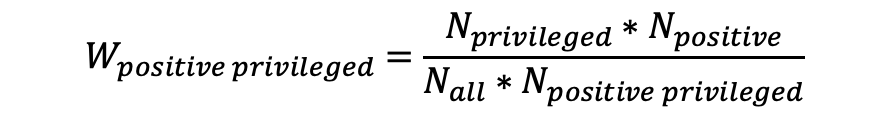

## <b>Train networks using Fairlearn</b>

### Prepare data
<a id='prepare'></a>

Data can be [feature layer](https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/) or a simple dataframe. The data for Fairness with `arcgis.learn` api is prepared the same way it is prepared for [supervised learning ML Models](https://developers.arcgis.com/python/guide/ml-and-dl-on-tabular-data/).


In [ ]:
from arcgis.learn import MLModel, prepare_tabulardata 
data = prepare_tabulardata(<input_features>,
                               <variable_predict>,
                               explanatory_variables=<input_columns>,
                               preprocessors=<preprocessors>)

### Train networks using Fairlearn models
<a id='Fairlearn'></a>

Fairness_args in MLModel class accepts the following paramters as fairness_args while initialization :
    
- `sensitive_feature` : Protected class column or feature name
- `mitigation_type` : reweighing, threshold_optimize or exponentiated_gradient
- `mitigation_constraint` : demographic_parity or equalized_odds


In [ ]:
fairness_args = {
    'sensitive_feature': 'Gender',  
    'mitigation_type': "threshold_optimizer", #exponentiated_gradient , #reweighing
    'mitigation_constraint':'demographic_parity'
}

We prepare the model by providing fairness arguments and data as shown above and train it.
- `data` : data object from `prepare_tabulardata` function in the previous step.

In [ ]:
model = MLModel(data, "lightgbm.LGBMClassifier", fairness_args=fairness_args, n_estimators=500, random_state=43)
model.fit()

We check fairness score by calling `model.fairness_score('sensitive_feature')` method

In [ ]:
score = model.fairness_score(sensitive_feature = 'Gender',visualize=True)

### Conclusion <a class="anchor" id="10"></a>

This guide explains how fairness can be applied with mitigation methods. For more information about the API, refer to the <a href="https://developers.arcgis.com/python/api-reference/arcgis.learn.toc.html">API reference</a>

## References

[1] Fairlearn documentation https://fairlearn.org/v0.8/user_guide/index.html